In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# import tsfel

# # Load the dataset (e.g., time series power data)
# data = pd.read_csv('synthetic_power_data.csv')

# # Extract a single column of time series data (e.g., 'power_consumption')
# time_series = data['power_consumption']

# # Extract features using TSFEL
# # Load default configuration for feature extraction
# cfg = tsfel.get_features_by_domain('all')

# # Extract features
# features = tsfel.time_series_features_extractor(cfg, time_series)

# # Display extracted features
# print(features.head())

# Load the dataset
data = pd.read_csv('synthetic_power_data.csv')

# Handle Missing Values
# Apply fillna only to numeric columns
# Identify numeric columns, NaNs and fill the NaNs with mean value
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 2: Remove Outliers (Using IQR Method)
debug = True  # Set to True to print IQR debugging information

# Exclude non-continuous columns like 'holiday' from outlier removal
continuous_columns = [col for col in numeric_columns if col != 'holiday']

Q1 = data[continuous_columns].quantile(0.25)
Q3 = data[continuous_columns].quantile(0.75)
IQR = Q3 - Q1

# Relax the bounds to retain more data
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

if debug:
    print("Q1:\n", Q1)
    print("Q3:\n", Q3)
    print("Lower Bound:\n", lower_bound)
    print("Upper Bound:\n", upper_bound)

# Apply bounds to continuous columns only
data_filtered = data.copy()
for col in continuous_columns:
    data_filtered = data_filtered[(data_filtered[col] >= lower_bound[col]) & (data_filtered[col] <= upper_bound[col])]

if data_filtered.empty:
    print("Warning: Outlier removal resulted in empty DataFrame. Skipping outlier removal.")
else:
    data = data_filtered.dropna()

# Debugging: Print data shape after outlier removal
print("Data shape after outlier removal:", data.shape)

# Step 3: Normalize Numeric Data (MinMaxScaler)
if data.empty:
    raise ValueError("DataFrame is empty after preprocessing. Please check earlier steps.")

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

# Convert back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=numeric_columns)

# Step 4: Add Time-Based Features
# Convert 'timestamp' to datetime if it’s not already
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Add hour, weekday, and month features
data_scaled['hour'] = data['timestamp'].dt.hour
data_scaled['weekday'] = data['timestamp'].dt.weekday
data_scaled['month'] = data['timestamp'].dt.month

# Step 5: One-Hot Encode Categorical Features (e.g., weekday, month)
encoder = OneHotEncoder(sparse_output=False)
time_features = encoder.fit_transform(data_scaled[['weekday', 'month']])

# Merge encoded features back into the dataset
time_features_df = pd.DataFrame(time_features, columns=encoder.get_feature_names_out())
data_preprocessed = pd.concat([data_scaled, time_features_df], axis=1).drop(['weekday', 'month'], axis=1)

# Display the first few rows of the preprocessed data
print("Data Preprocessing Complete. Preview:")
print(data_preprocessed.head())


Q1:
 power_consumption    1203.7475
temperature            18.2900
Name: 0.25, dtype: float64
Q3:
 power_consumption    1800.7225
temperature            31.6700
Name: 0.75, dtype: float64
Lower Bound:
 power_consumption   -587.1775
temperature          -21.8500
dtype: float64
Upper Bound:
 power_consumption    3591.6475
temperature            71.8100
dtype: float64
Data shape after outlier removal: (8760, 4)
Data Preprocessing Complete. Preview:
   power_consumption  temperature  holiday  hour  weekday_0  weekday_1  \
0           0.237977     0.662000      0.0     0        0.0        0.0   
1           0.250193     0.370333      0.0     1        0.0        0.0   
2           0.303625     0.468667      0.0     2        0.0        0.0   
3           0.355623     0.832333      0.0     3        0.0        0.0   
4           0.321395     0.778000      0.0     4        0.0        0.0   

   weekday_2  weekday_3  weekday_4  weekday_5  ...  month_3  month_4  month_5  \
0        0.0        0.0 

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0761 - mae: 0.2121 - val_loss: 0.0043 - val_mae: 0.0526
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0074 - mae: 0.0670 - val_loss: 0.0035 - val_mae: 0.0473
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0058 - mae: 0.0592 - val_loss: 0.0025 - val_mae: 0.0387
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0049 - mae: 0.0545 - val_loss: 0.0025 - val_mae: 0.0394
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0041 - mae: 0.0501 - val_loss: 0.0022 - val_mae: 0.0370
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0039 - mae: 0.0482 - val_loss: 0.0024 - val_mae: 0.0383
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0036 - mae: 0.0466 - val_loss: 0.0022 - val_mae: 0.0369
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033 - mae: 0.0446 - val_loss: 0.0027 - val_mae: 0.0401
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 

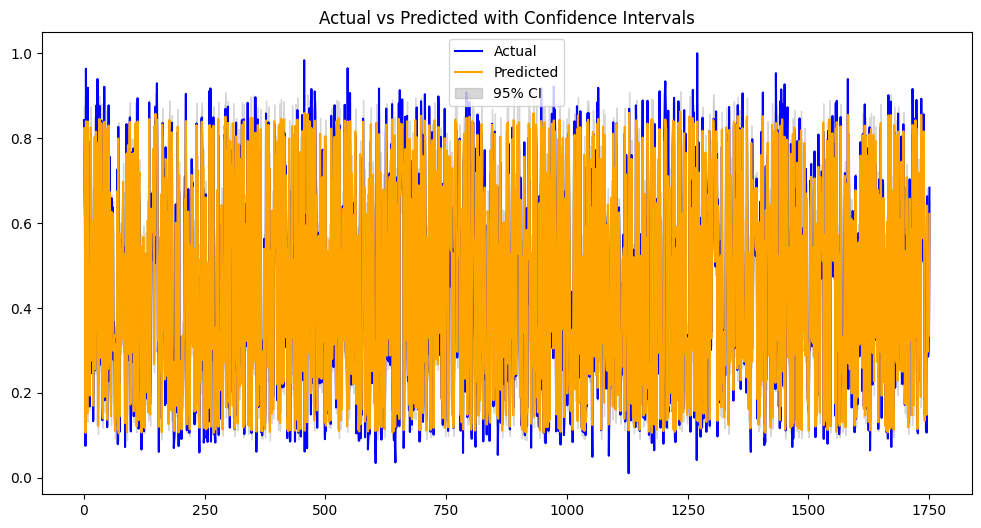

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Train-Test Split
# Separate features and target
X = data_preprocessed.drop(columns=['power_consumption'])  # Features
y = data_preprocessed['power_consumption']                # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 2: Define and Train LSTM Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Single output (power consumption)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Step 3: Evaluate the Model
# Make predictions
y_pred = model.predict(X_test_reshaped)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Step 4: Generate Probabilistic Forecasts using Monte Carlo Dropout
mc_samples = 100  # Number of Monte Carlo samples
predictions = np.array([model(X_test_reshaped, training=True).numpy() for _ in range(mc_samples)])

# Calculate mean prediction and confidence intervals
mean_prediction = predictions.mean(axis=0)
lower_bound = np.percentile(predictions, 2.5, axis=0)  # 2.5th percentile for 95% confidence
upper_bound = np.percentile(predictions, 97.5, axis=0)  # 97.5th percentile for 95% confidence

# Step 5: Visualize Forecasts
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(mean_prediction, label="Predicted", color="orange")
plt.fill_between(range(len(mean_prediction)), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.3, label="95% CI")
plt.legend()
plt.title("Actual vs Predicted with Confidence Intervals")
plt.show()


In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error

# Function to create the LSTM model with hyperparameters from Optuna
def create_model(trial):
    # Hyperparameter search space
    lstm_units = trial.suggest_int('lstm_units', 32, 128)  # LSTM units
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)  # Dropout rate
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
    batch_size = trial.suggest_int('batch_size', 16, 64)  # Batch size

    # Define the model
    model = Sequential([
        LSTM(lstm_units, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dense(1)  # Single output (power consumption)
    ])

    # Compile the model with the suggested learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])

    return model, batch_size

# Objective function to be minimized (using Optuna)
def objective(trial):
    model, batch_size = create_model(trial)

    # Train the model
    history = model.fit(X_train_reshaped, y_train,
                        epochs=10, batch_size=batch_size,
                        validation_data=(X_test_reshaped, y_test),
                        verbose=0)

    # Get predictions and calculate metrics
    y_pred = model.predict(X_test_reshaped)
    mae = mean_absolute_error(y_test, y_pred)

    return mae  # We minimize MAE (lower is better)

# Step 1: Create and Optimize the Study
study = optuna.create_study(direction='minimize')  # Minimize MAE
study.optimize(objective, n_trials=30)  # Number of trials

# Step 2: Output the Best Hyperparameters
print("Best hyperparameters found:")
print(study.best_params)

# Step 3: Train the Final Model with Best Hyperparameters
best_params = study.best_params
best_model, best_batch_size = create_model(study.best_trial)

# Train the final model with the optimal hyperparameters
history = best_model.fit(X_train_reshaped, y_train,
                         epochs=20, batch_size=best_batch_size,
                         validation_data=(X_test_reshaped, y_test),
                         verbose=1)

# Final Evaluation
y_pred_final = best_model.predict(X_test_reshaped)
final_mae = mean_absolute_error(y_test, y_pred_final)
print(f"Final MAE with optimal hyperparameters: {final_mae}")


[I 2024-11-30 16:44:23,954] A new study created in memory with name: no-name-4cd2e5ad-f179-4912-adc8-6d1845b9775f
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:44:32,729] Trial 0 finished with value: 0.04069655919421715 and parameters: {'lstm_units': 50, 'dropout_rate': 0.3290410098554716, 'learning_rate': 0.00439716783182341, 'batch_size': 53}. Best is trial 0 with value: 0.04069655919421715.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:44:42,424] Trial 1 finished with value: 0.24762487120742732 and parameters: {'lstm_units': 75, 'dropout_rate': 0.48263178619412994, 'learning_rate': 1.593526014743291e-05, 'batch_size': 50}. Best is trial 0 with value: 0.04069655919421715.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:44:59,603] Trial 2 finished with value: 0.03503532808180069 and parameters: {'lstm_units': 120, 'dropout_rate': 0.4017201106962929, 'learning_rate': 0.006415229294706866, 'batch_size': 18}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-11-30 16:45:10,398] Trial 3 finished with value: 0.03732611900309873 and parameters: {'lstm_units': 121, 'dropout_rate': 0.448967278916643, 'learning_rate': 0.001802181817132981, 'batch_size': 51}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:45:23,637] Trial 4 finished with value: 0.1300921400821962 and parameters: {'lstm_units': 109, 'dropout_rate': 0.4994081553498827, 'learning_rate': 3.9484694371731056e-05, 'batch_size': 40}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2024-11-30 16:45:32,489] Trial 5 finished with value: 0.0473031215255308 and parameters: {'lstm_units': 62, 'dropout_rate': 0.43724849742955507, 'learning_rate': 0.0049700847644864096, 'batch_size': 38}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:45:42,246] Trial 6 finished with value: 0.04892582374714066 and parameters: {'lstm_units': 82, 'dropout_rate': 0.49398415286287045, 'learning_rate': 0.008092067380582687, 'batch_size': 37}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:45:51,984] Trial 7 finished with value: 0.03686549730807027 and parameters: {'lstm_units': 77, 'dropout_rate': 0.22604794316607452, 'learning_rate': 0.0018428124894599625, 'batch_size': 49}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-11-30 16:46:02,264] Trial 8 finished with value: 0.06713408942387533 and parameters: {'lstm_units': 41, 'dropout_rate': 0.34505230214891314, 'learning_rate': 0.00011017247129147079, 'batch_size': 43}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:46:16,085] Trial 9 finished with value: 0.1745668695663254 and parameters: {'lstm_units': 101, 'dropout_rate': 0.2004905913164382, 'learning_rate': 2.290452544982756e-05, 'batch_size': 31}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:46:34,176] Trial 10 finished with value: 0.03528440981287663 and parameters: {'lstm_units': 126, 'dropout_rate': 0.38563371362806986, 'learning_rate': 0.0004231233812972233, 'batch_size': 16}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:46:52,166] Trial 11 finished with value: 0.03826221039769805 and parameters: {'lstm_units': 128, 'dropout_rate': 0.38773588594302577, 'learning_rate': 0.00042309551085513864, 'batch_size': 16}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:47:07,914] Trial 12 finished with value: 0.035313075250060534 and parameters: {'lstm_units': 101, 'dropout_rate': 0.2632343049360905, 'learning_rate': 0.0003651819804015906, 'batch_size': 16}. Best is trial 2 with value: 0.03503532808180069.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:47:22,512] Trial 13 finished with value: 0.033874823687136055 and parameters: {'lstm_units': 113, 'dropout_rate': 0.10413097139603117, 'learning_rate': 0.001138424642067821, 'batch_size': 26}. Best is trial 13 with value: 0.033874823687136055.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:47:36,155] Trial 14 finished with value: 0.03281841645154583 and parameters: {'lstm_units': 110, 'dropout_rate': 0.10110827870769913, 'learning_rate': 0.001374812381347625, 'batch_size': 26}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:47:46,870] Trial 15 finished with value: 0.03467260152342668 and parameters: {'lstm_units': 94, 'dropout_rate': 0.1052521897935035, 'learning_rate': 0.001210111781221908, 'batch_size': 64}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:48:01,477] Trial 16 finished with value: 0.03794343316929843 and parameters: {'lstm_units': 111, 'dropout_rate': 0.1147002754084227, 'learning_rate': 0.0008909046733665317, 'batch_size': 25}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:48:15,775] Trial 17 finished with value: 0.03918272374989796 and parameters: {'lstm_units': 94, 'dropout_rate': 0.15950548498877953, 'learning_rate': 0.00012333563602945157, 'batch_size': 26}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:48:29,659] Trial 18 finished with value: 0.03910526525643632 and parameters: {'lstm_units': 112, 'dropout_rate': 0.16080968791709144, 'learning_rate': 0.0001781924192149283, 'batch_size': 26}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:48:40,100] Trial 19 finished with value: 0.03520546849588555 and parameters: {'lstm_units': 89, 'dropout_rate': 0.14485920156949117, 'learning_rate': 0.0022734291086114445, 'batch_size': 32}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:48:54,340] Trial 20 finished with value: 0.03488273534500613 and parameters: {'lstm_units': 69, 'dropout_rate': 0.20930527546128086, 'learning_rate': 0.0007444898903891063, 'batch_size': 22}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:49:04,882] Trial 21 finished with value: 0.03414494820509891 and parameters: {'lstm_units': 99, 'dropout_rate': 0.10589380825207045, 'learning_rate': 0.000977590706205769, 'batch_size': 61}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:49:15,750] Trial 22 finished with value: 0.03441108243366073 and parameters: {'lstm_units': 103, 'dropout_rate': 0.10507808859969596, 'learning_rate': 0.002808107822579728, 'batch_size': 62}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:49:28,404] Trial 23 finished with value: 0.033875023185999525 and parameters: {'lstm_units': 115, 'dropout_rate': 0.13870414995199598, 'learning_rate': 0.0007471357262106895, 'batch_size': 33}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-11-30 16:49:41,436] Trial 24 finished with value: 0.03858930789948633 and parameters: {'lstm_units': 117, 'dropout_rate': 0.1813079304866148, 'learning_rate': 0.00020790574379089073, 'batch_size': 31}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:49:54,590] Trial 25 finished with value: 0.03743768661884786 and parameters: {'lstm_units': 109, 'dropout_rate': 0.2531740132595709, 'learning_rate': 0.0006274245756092609, 'batch_size': 34}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:50:09,971] Trial 26 finished with value: 0.038043006150901594 and parameters: {'lstm_units': 86, 'dropout_rate': 0.13916432818836008, 'learning_rate': 0.0030494079505626647, 'batch_size': 21}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:50:25,563] Trial 27 finished with value: 0.03456360096343173 and parameters: {'lstm_units': 118, 'dropout_rate': 0.1413379300462424, 'learning_rate': 0.0013515270255458612, 'batch_size': 28}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:50:36,122] Trial 28 finished with value: 0.058439014488711506 and parameters: {'lstm_units': 106, 'dropout_rate': 0.18223901579783952, 'learning_rate': 6.27693445664227e-05, 'batch_size': 45}. Best is trial 14 with value: 0.03281841645154583.
<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-30 16:50:46,471] Trial 29 finished with value: 0.06192072221777663 and parameters: {'lstm_units': 49, 'dropout_rate': 0.3071993758445032, 'learning_rate': 0.0034222479585826904, 'batch_size': 35}. Best is trial 14 with value: 0.03281841645154583.


Best hyperparameters found:
{'lstm_units': 110, 'dropout_rate': 0.10110827870769913, 'learning_rate': 0.001374812381347625, 'batch_size': 26}
Epoch 1/20


<ipython-input-11-4fdb0da67042>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0912 - mae: 0.2075 - val_loss: 0.0031 - val_mae: 0.0437
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045 - mae: 0.0520 - val_loss: 0.0025 - val_mae: 0.0384
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038 - mae: 0.0474 - val_loss: 0.0021 - val_mae: 0.0354
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - mae: 0.0433 - val_loss: 0.0022 - val_mae: 0.0372
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029 - mae: 0.0419 - val_loss: 0.0022 - val_mae: 0.0370
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028 - mae: 0.0408 - val_loss: 0.0018 - val_mae: 0.0336
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 0.0019 - val_mae: 0.0337
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0025 - mae: 0.0388 - val_loss: 0.0021 - val_mae: 0.0359
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025 

In [ ]:
!pip install shap

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━

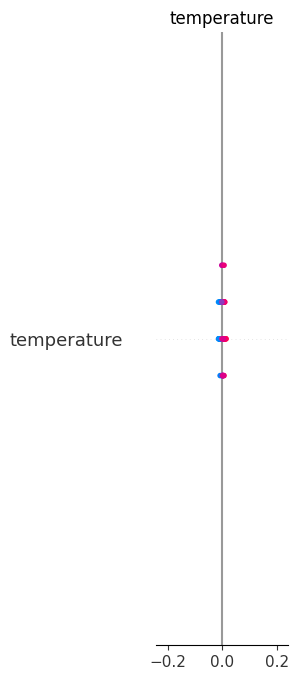

IndexError: index 22 is out of bounds for axis 0 with size 22

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Train the Model (if not already done)
# This assumes you've trained the model in the previous steps and have a final model `best_model` trained with optimal hyperparameters.

# Step 2: Create a custom function to reshape the input for LSTM model predictions
def model_predict(input_data):
    # Reshape 2D input into 3D for LSTM (samples, time steps, features)
    input_reshaped = input_data.reshape(input_data.shape[0], 1, input_data.shape[1])
    return best_model.predict(input_reshaped)

# Step 3: SHAP Explainer
# Flatten the 3D data (X_test_reshaped) to 2D (remove the time dimension) for SHAP
X_test_flat = X_test_reshaped.reshape(X_test_reshaped.shape[0], X_test_reshaped.shape[2])

# Create a SHAP explainer object using the model_predict function (which reshapes the input for LSTM)
explainer = shap.KernelExplainer(model_predict, X_train_reshaped[:100].reshape(100, X_train_reshaped.shape[2]))  # Using a subset of training data for background

# Get SHAP values for the test set (using the flattened test data)
shap_values = explainer.shap_values(X_test_flat[:100])  # Using a subset of the test data for explanation

# Step 4: SHAP Summary Plot (Overall feature importance)
shap.summary_plot(shap_values, X_test_flat[:100], feature_names=X.columns)

# Step 5: SHAP Dependence Plot (Individual feature influence on prediction)
# Example: Influence of the first feature on model prediction
shap.dependence_plot(0, shap_values[0], X_test_flat[:100], feature_names=X.columns)

# Step 6: Visualize Model Performance Trends
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100].values, label="Actual", color="blue")
plt.plot(y_pred_final[:100], label="Predicted", color="orange")
plt.legend()
plt.title("Actual vs Predicted for Model Performance")
plt.show()

# Step 7: SHAP Force Plot (Explain a specific prediction)
# Example: Explain the first prediction from the test set
shap.initjs()  # Initializes JS visualization for force plot in Jupyter
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_flat[:100][0], feature_names=X.columns)


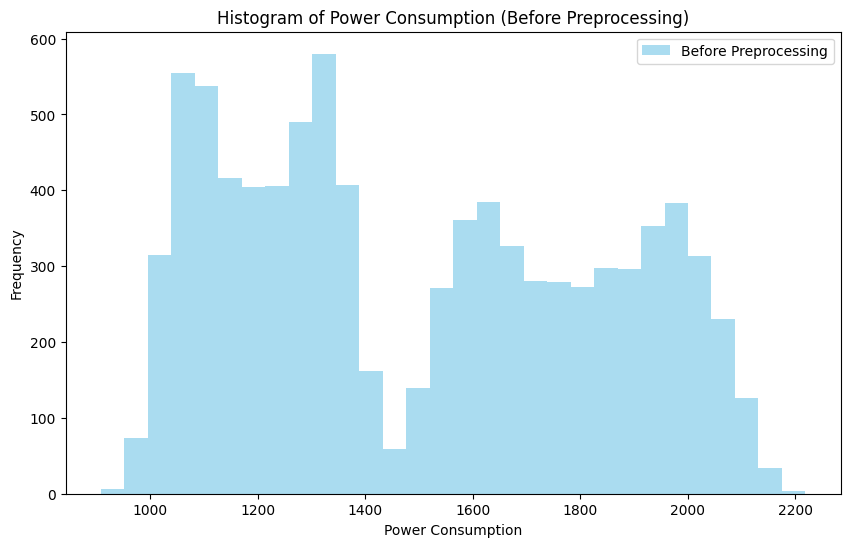

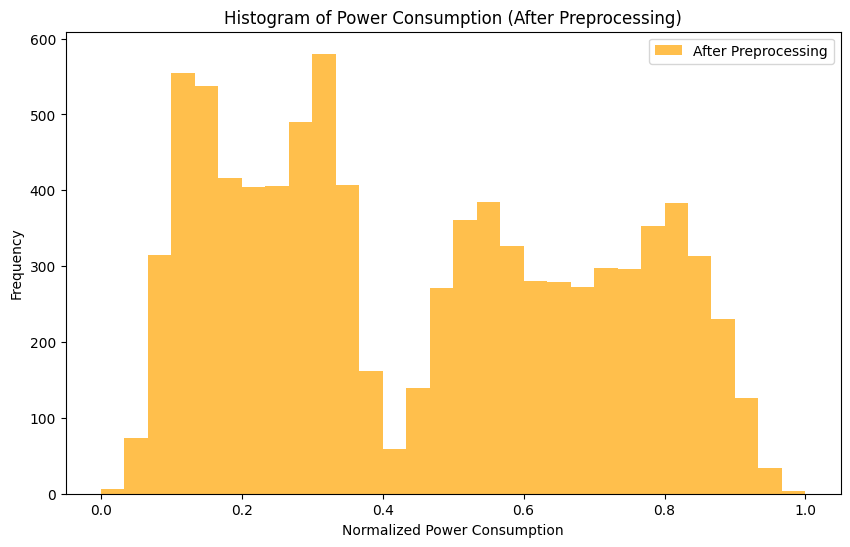

In [ ]:
import matplotlib.pyplot as plt

# Histogram before preprocessing (raw data)
plt.figure(figsize=(10, 6))
plt.hist(data['power_consumption'], bins=30, color='skyblue', alpha=0.7, label='Before Preprocessing')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Power Consumption (Before Preprocessing)')
plt.legend()
plt.show()

# Histogram after normalization (processed data)
plt.figure(figsize=(10, 6))
plt.hist(data_preprocessed['power_consumption'], bins=30, color='orange', alpha=0.7, label='After Preprocessing')
plt.xlabel('Normalized Power Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Power Consumption (After Preprocessing)')
plt.legend()
plt.show()


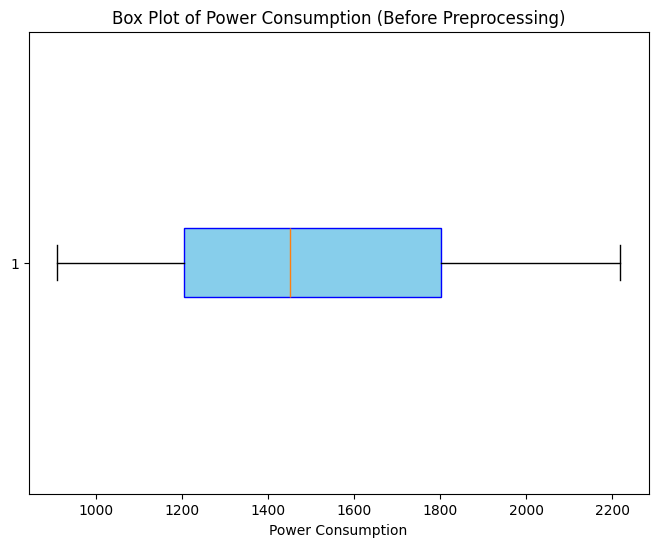

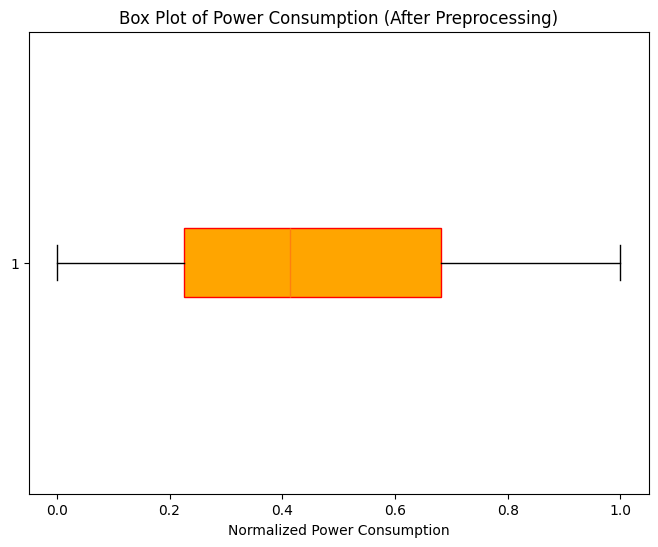

In [ ]:
# Box plot for raw data (before preprocessing)
plt.figure(figsize=(8, 6))
plt.boxplot(data['power_consumption'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
plt.title('Box Plot of Power Consumption (Before Preprocessing)')
plt.xlabel('Power Consumption')
plt.show()

# Box plot for processed data (after normalization)
plt.figure(figsize=(8, 6))
plt.boxplot(data_preprocessed['power_consumption'], vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='red'))
plt.title('Box Plot of Power Consumption (After Preprocessing)')
plt.xlabel('Normalized Power Consumption')
plt.show()


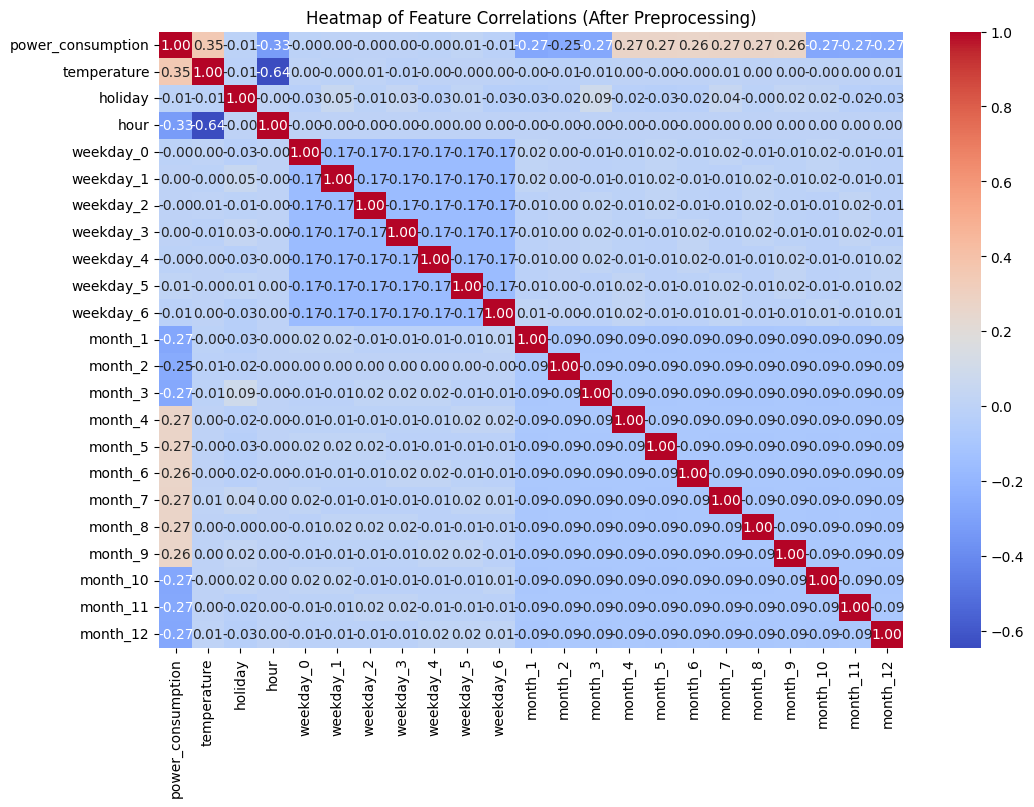

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns for correlation (excluding one-hot encoded features if not needed)
numeric_features = ['power_consumption', 'temperature', 'holiday', 'hour'] + \
                   [col for col in data_preprocessed.columns if 'weekday_' in col or 'month_' in col]

# Compute the correlation matrix
correlation_matrix = data_preprocessed[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap of Feature Correlations (After Preprocessing)')
plt.show()


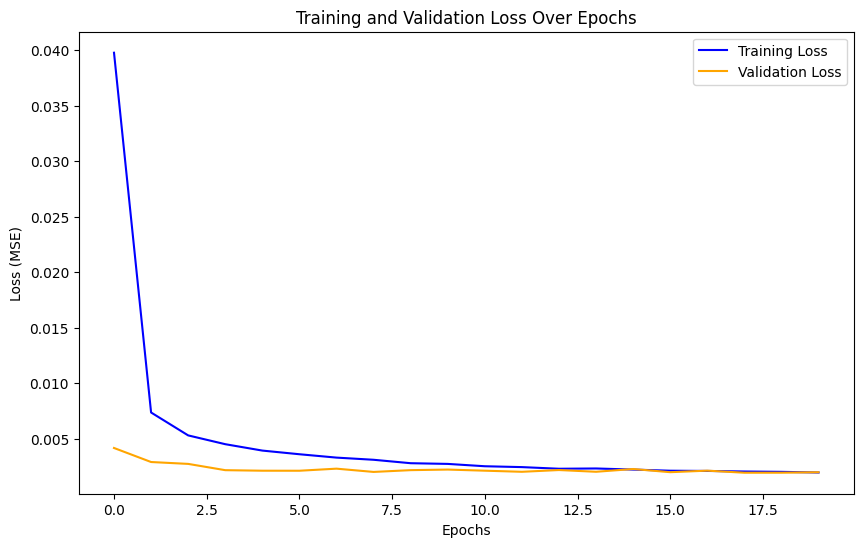

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━

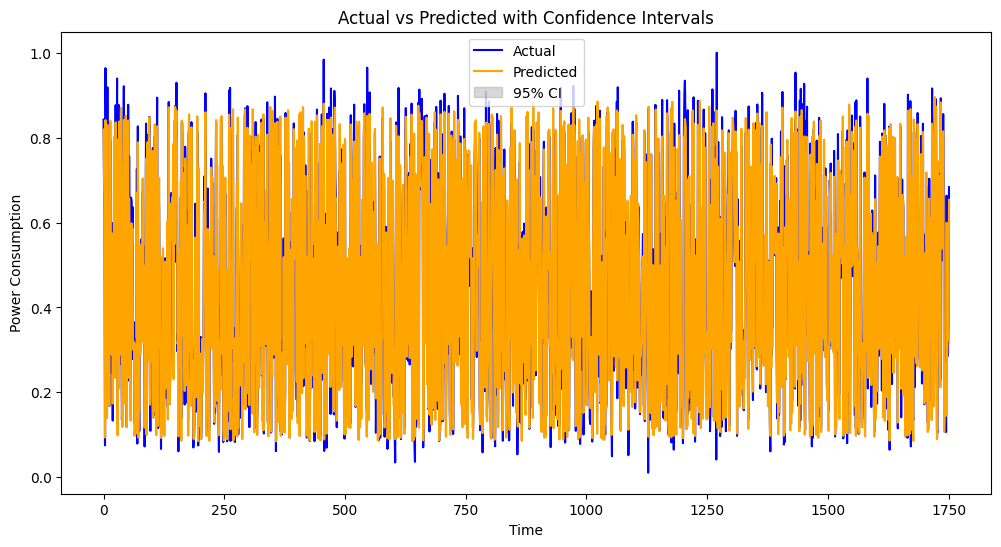

In [ ]:
# Monte Carlo Dropout Predictions
mc_samples = 100
predictions = np.array([best_model.predict(X_test_reshaped) for _ in range(mc_samples)])

# Compute mean prediction and confidence intervals
mean_prediction = predictions.mean(axis=0).flatten()
lower_bound = np.percentile(predictions, 2.5, axis=0).flatten()
upper_bound = np.percentile(predictions, 97.5, axis=0).flatten()

# Plot actual vs predicted with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(mean_prediction, label='Predicted', color='orange')
plt.fill_between(range(len(mean_prediction)), lower_bound, upper_bound, color='gray', alpha=0.3, label='95% CI')
plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.title('Actual vs Predicted with Confidence Intervals')
plt.legend()
plt.show()


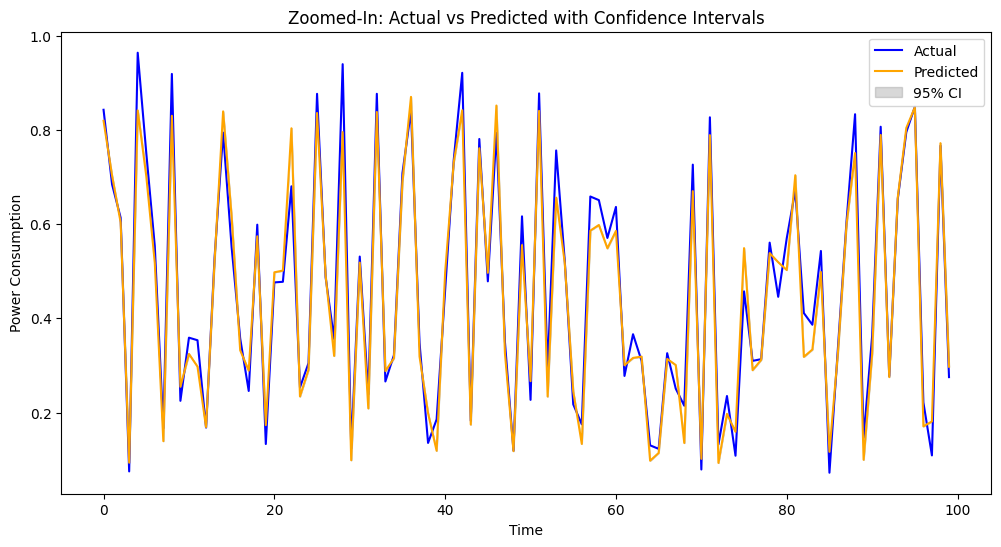

In [ ]:
# Zoomed-in section (e.g., first 100 points)
zoom_range = 100  # Adjust as needed
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:zoom_range], label='Actual', color='blue')
plt.plot(mean_prediction[:zoom_range], label='Predicted', color='orange')
plt.fill_between(range(zoom_range), lower_bound[:zoom_range], upper_bound[:zoom_range], color='gray', alpha=0.3, label='95% CI')
plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.title('Zoomed-In: Actual vs Predicted with Confidence Intervals')
plt.legend()
plt.show()


In [ ]:
import optuna.visualization as vis

# Plot optimization history
optuna_history = vis.plot_optimization_history(study)
optuna_history.show()


In [ ]:
# Plot hyperparameter importance
optuna_importance = vis.plot_param_importances(study)
optuna_importance.show()


In [ ]:
# Print the best hyperparameters and corresponding performance
print("Best Hyperparameters Found:")
print(study.best_params)
print(f"Best MAE: {study.best_value}")


Best Hyperparameters Found:
{'lstm_units': 110, 'dropout_rate': 0.10110827870769913, 'learning_rate': 0.001374812381347625, 'batch_size': 26}
Best MAE: 0.03281841645154583


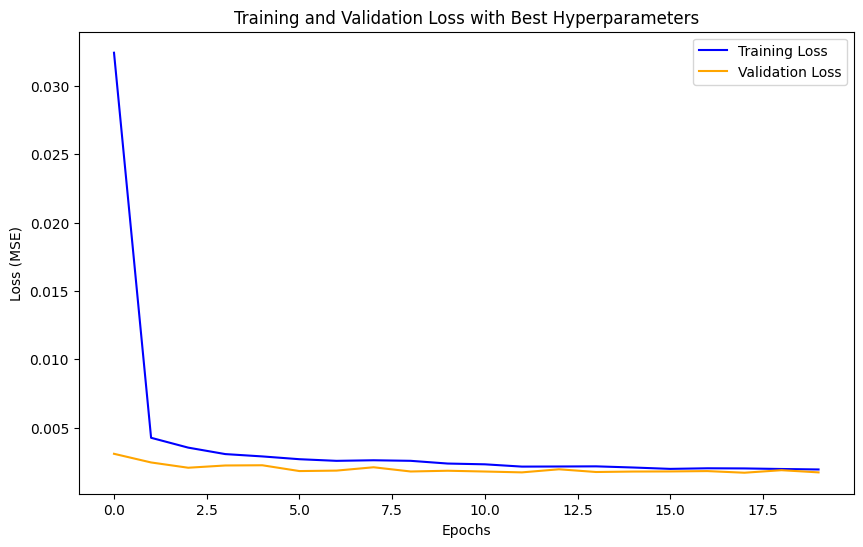

In [ ]:
# Plot training and validation loss of the final model
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss with Best Hyperparameters')
plt.legend()
plt.show()
